In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\HP\restaurant dataset.csv')
df

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000
...,...,...,...,...,...,...,...,...
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500


In [3]:
df.shape

(6593, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


In [5]:
df.isna().sum()

Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
dtype: int64

In [6]:
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


In [7]:
df.tail()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500
6592,Urban Vibes,"Aggar Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Italian, Chine...",3.8,12,2000


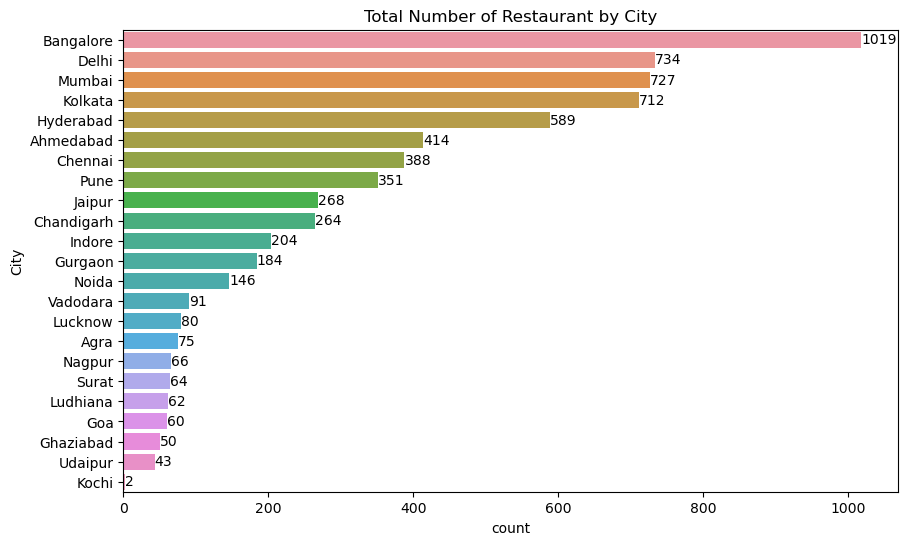

In [8]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,y=df['City'],order=df['City'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Total Number of Restaurant by City')    
plt.show()

### From the graph above, maximum number of Restaurants are in Bangalore where as only 2 Restaurants are available in Kochi

#### Let's find out in which localities in above cities have maximum number of Restaurants 

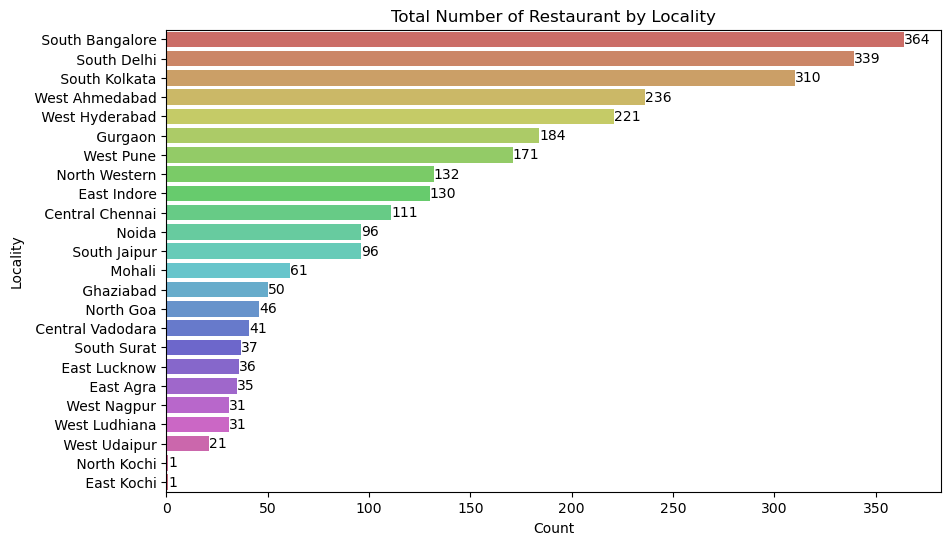

In [9]:
df['Count']=1
a1=df.groupby(by=['City', 'Locality'], as_index=False)['Count'].sum()
a2=a1.groupby(by=['City'],as_index=False)['Count'].max()
rest_count=a1.merge(a2)
rest_count.sort_values(by=['Count'],ascending=False,inplace=True)

plt.figure(figsize=(10,6))
bx=sns.barplot(x=rest_count['Count'],y=rest_count['Locality'],palette='hls')

for i in bx.containers:
    bx.bar_label(i)

plt.title('Total Number of Restaurant by Locality')    
plt.show()

### So from the bar graph maximum concentration of Restaurants are in Bangalore is in  South Bangalore  which is approx 38% where as almost 47% of Restaurants in Delhi are in South Delhi

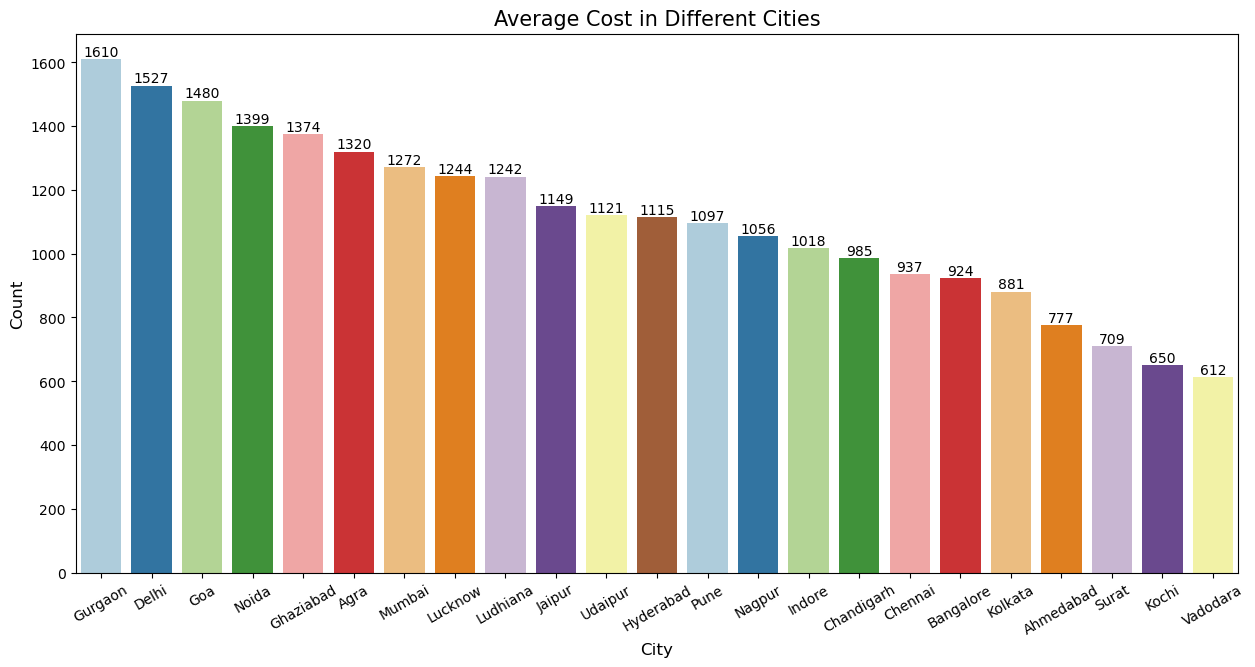

In [10]:
avg_price=df.groupby(by=['City'])[['Cost']].mean().sort_values(by=['Cost'],ascending=False).round(0).reset_index()

plt.figure(figsize=(15,7))
bx=sns.barplot(data=avg_price,x='City',y='Cost',palette='Paired')
for i in bx.containers:
    bx.bar_label(i)

plt.xlabel('City',size=12)
plt.ylabel('Count',size=12)
plt.xticks(rotation=30)    
plt.title('Average Cost in Different Cities',size=15)    
plt.show()

In [27]:
d1=df.groupby(by=['City', 'Locality'], as_index=False)['Cost'].mean().round(2)
d2=d1.groupby(by=['City'],as_index=False)['Cost'].max()
max_count=d1.merge(d2)
max_count.sort_values(by=['Cost'],ascending=False,inplace=True)

d3=df.groupby(by=['City', 'Locality'], as_index=False)['Cost'].mean().round(2)
d4=d3.groupby(by=['City'],as_index=False)['Cost'].min()
min_count=d3.merge(d4)
min_count.sort_values(by=['Cost'],ascending=False,inplace=True)

mer_col=pd.merge(max_count,min_count,on='City')
mer_col.columns=['City', 'Locality (High)', 'Cost (High)', 'Locality (Low)', 'Cost (Low)']

mer_col.sort_values(by=['City'],ascending=True,inplace=True)
mer_col.set_index('City',inplace=True)
mer_col

,Locality (High),Cost (High),Locality (Low),Cost (Low)
City,,,,
Agra,East Agra,1854.29,West Agra,760.00
Ahmedabad,Central Ahmedabad,956.25,East Ahmedabad,593.33
Bangalore,Central Bangalore,1349.61,Bangalore Mangalore Highway,700.00
Bangalore,Central Bangalore,1349.61,Mysore Highway,700.00
Bangalore,Central Bangalore,1349.61,North Mysore,700.00
Chandigarh,East Chandigarh,1139.62,Mohali,800.00
Chennai,Central Chennai,1159.46,West Chennai,700.00
Delhi,Central Delhi,1853.15,North Delhi,1187.84
Ghaziabad,Ghaziabad,1374.00,Ghaziabad,1374.00


### The above table helps to understand in which locality the average cost is high and low in a particular cities.

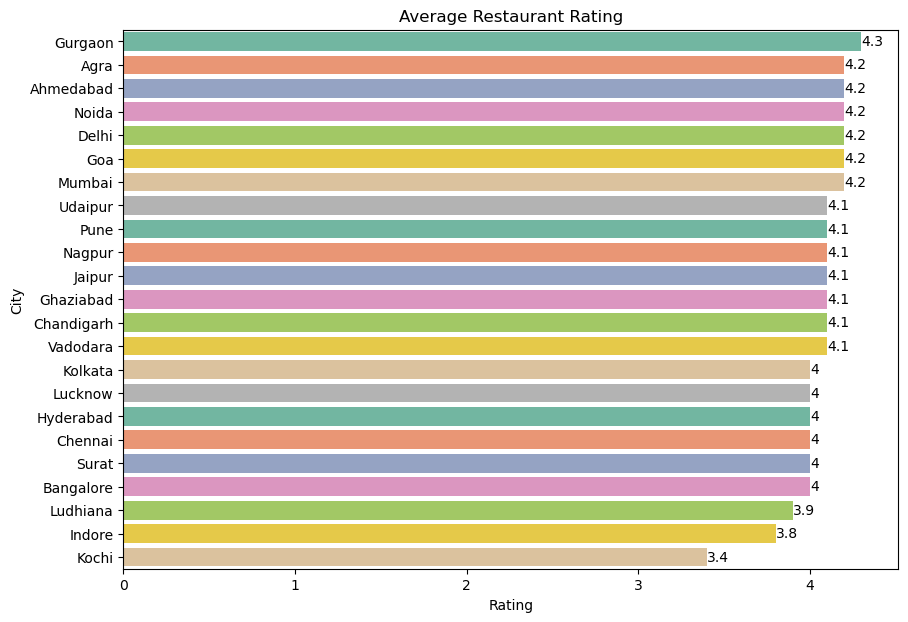

In [11]:
avg_rating=df.groupby(by=['City'],as_index=False)['Rating'].mean().round(1).sort_values(by=['Rating'],ascending=False)

plt.figure(figsize=(10,7))
cx=sns.barplot(data=avg_rating,x='Rating',y='City',palette='Set2')
for i in cx.containers:
    cx.bar_label(i)
    
plt.title('Average Restaurant Rating')    
plt.show()

In [12]:
pop_cuisine=df.groupby(by=['Cuisine'],as_index=False)['Count'].sum().sort_values(by=['Count'],ascending=False)
list1=pop_cuisine[pop_cuisine['Count']>40]['Cuisine'].tolist()

list1
l=[]
for i in list1:
    l.append(i.split())
    
list2=[]
a=0
while a<len(l):
    list2=list2+l[a]
    a=a+1

cuisine_list=[]    
for j in list2:
    cuisine_list.append(j.replace(',',''))

set_l=set(cuisine_list)   
cuisine_list=list(set_l)
print(cuisine_list)

['Indian', 'Mughlai', 'Italian', 'Pizza', 'Tibetan', 'Continental', 'Food', 'Fast', 'Desserts', 'Confectionary', 'Mithai', 'Finger', 'North', 'Chinese', 'South', 'Bakery', 'Multi-Cuisine', 'Seafood', 'and']


### From the above analysis, these are the most popular cuisines among the restaurant

#### Let's find out the cities where the cost of dining is relatively low but the ratings are high, indicating good value for money

In [13]:
df_city=df.groupby(by=['City'],as_index=False)['Cost','Rating'].mean().round(1)
df_city[df_city['Rating']>=4.0].sort_values(by=['Cost'],ascending=True)

,City,Cost,Rating
22,Vadodara,612.1,4.1
20,Surat,709.4,4.0
1,Ahmedabad,777.3,4.2
13,Kolkata,880.9,4.0
2,Bangalore,924.3,4.0
4,Chennai,937.1,4.0
3,Chandigarh,984.8,4.1
17,Nagpur,1056.1,4.1
19,Pune,1096.7,4.1
9,Hyderabad,1114.9,4.0


### From the accompanied analysis we can say that the most value for money cities in terms of low pricing and high ratings are from Gujarat , then Kolkata and Bangalore state where as Gurgaon being the most expensive city 

In [37]:
df

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,Count
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,1
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,1
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,1
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,1
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,1
...,...,...,...,...,...,...,...,...,...
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600,1
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100,1
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100,1
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500,1
